# Sequence analysis of sequences obtained from TBLASTN search 

In [94]:
#This code takes DNA sequences obtained from TBLASTN search as a input and exclude duplicate sequences

def extract_unique_sequences_multiline(input_file, output_file):
    sequences = {}
    with open(input_file, 'r') as f:
        seq_id = None
        seq_lines = []
        for line in f:
            line = line.rstrip('\n')
            if line.startswith('>'):
                if seq_id is not None:
                    full_seq = ''.join(seq_lines)
                    # Store the first ID that this unique sequence appears under
                    if full_seq not in sequences:
                        sequences[full_seq] = seq_id
                seq_id = line
                seq_lines = []
            else:
                seq_lines.append(line)
        # Handle the last sequence in the file
        if seq_id is not None and seq_lines:
            full_seq = ''.join(seq_lines)
            if full_seq not in sequences:
                sequences[full_seq] = seq_id

    with open(output_file, 'w') as out:
        for seq, id_line in sequences.items():
            out.write(f"{id_line}\n")
            # Optionally break sequence every 60 chars for readability
            for i in range(0, len(seq), 60):
                out.write(seq[i:i+60] + "\n")

    print(f"Extraction complete. {len(sequences)} unique sequences written to {output_file}.")

# Example usage:

input_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_1 TBLASTN Search_Original downloaded DNA sequences from TBLASTN search.txt" 
output_file="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_2_Filtered duplicate DNA seq obtained from TBLASTN Search.txt" 

extract_unique_sequences_multiline(input_file, output_file)

Extraction complete. 1298 unique sequences written to /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_2_Filtered duplicate DNA seq obtained from TBLASTN Search.txt.


# Filtering sequences containing stop codons

In [95]:
# EMBOSS Transeq was used to translate nucleic acid sequences into their corresponding peptide sequences, generating translations in all three forward and three reverse reading frames simultaneously.
# The script uses translated sequences as input and removes sequences containing stop codons.


def remove_stop_codon_sequences(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    output_lines = []
    keep = False
    valid_count = 0

    for i in range(0, len(lines)):
        line = lines[i].strip()

        if line.startswith(">"):
            # Look ahead to get the sequence
            if i + 1 < len(lines):
                sequence = lines[i + 1].strip()
                if "*" not in sequence:
                    output_lines.append(line + "\n")
                    output_lines.append(sequence + "\n")
                    valid_count += 1

    # Write the cleaned output
    with open(output_path, 'w') as outfile:
        outfile.writelines(output_lines)

    print(f"Number of sequences without stop codons: {valid_count}")


# Example usage:

input_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_3_Filtered sequnces traslated using EMBOS TRANSEQ.txt" 
output_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_4_Removed Stop codons from translated sequences.txt" 

remove_stop_codon_sequences(input_file, output_file)


Number of sequences without stop codons: 1280


# Removal of duplicate sequences following translation and stop codon filtering

In [96]:
# This script uses translated sequences with stop codons removed as input and eliminates duplicate sequences.

def extract_unique_sequences_multiline(input_file, output_file):
    sequences = {}
    with open(input_file, 'r') as f:
        seq_id = None
        seq_lines = []
        for line in f:
            line = line.rstrip('\n')
            if line.startswith('>'):
                if seq_id is not None:
                    full_seq = ''.join(seq_lines)
                    # Store the first ID that this unique sequence appears under
                    if full_seq not in sequences:
                        sequences[full_seq] = seq_id
                seq_id = line
                seq_lines = []
            else:
                seq_lines.append(line)
        # Handle the last sequence in the file
        if seq_id is not None and seq_lines:
            full_seq = ''.join(seq_lines)
            if full_seq not in sequences:
                sequences[full_seq] = seq_id

    with open(output_file, 'w') as out:
        for seq, id_line in sequences.items():
            out.write(f"{id_line}\n")
            # Optionally break sequence every 60 chars for readability
            for i in range(0, len(seq), 60):
                out.write(seq[i:i+60] + "\n")

    print(f"Extraction complete. {len(sequences)} unique sequences written to {output_file}.")

# Example usage:
input_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_4_Removed Stop codons from translated sequences.txt" 
output_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_5_Remove duplicate sequences after removing stop codons_788_unique sequnces form TBLASTN search.txt" 

extract_unique_sequences_multiline(input_file, output_file)


Extraction complete. 788 unique sequences written to /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_5_Remove duplicate sequences after removing stop codons_788_unique sequnces form TBLASTN search.txt.


# Pfam sequence analysis

In [8]:
#Script for extracting B-domain–like sequences from the Pfam database
#This script was shared by a representative from the European Bioinformatics Institute (EMBL-EBI).

"""
Trim proteins sequences to the Pfam domain boundaries using the InterPro API.

$ python trim_sequence.py > output.fa
"""

import requests
from time import sleep

def main():
    pfam_id= "PF02216"  # Example Pfam ID
    api_url=f"https://www.ebi.ac.uk/interpro/api/protein/uniprot/entry/pfam/{pfam_id}?page_size=200&extra_fields=sequence"
    api_output = get_interpro_data(api_url)
    trimmed = trim_sequence(api_output)
    print("\n".join(trimmed))

def get_interpro_data(url):
  output = []
  
  while url:
    attempts = 0
    while attempts < 3:
      try:
        response = requests.get(url, headers={"Accept": "application/json"})
        if response.status_code == 408:
          attempts += 1
          print(f"Received 408 Timeout. Retrying {attempts}/3...")
          sleep(61)
          continue
        elif response.status_code == 204:
          #no data so leave loop
          break
        response.raise_for_status()
        data = response.json()

        if data.get('results'):
          output.extend(data.get('results'))
        else:
          output.append(data)

        url = data.get('next', "")
        sleep(1)
        break
      except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        break
    else:
      print("Max retries reached for URL:", url)
      break

  return output

def trim_sequence(api_output):
    all_trimmed = []
    for protein in api_output:
        # Get the protein sequence
        sequence = protein["extra_fields"]["sequence"]
        protein_acc = protein.get("metadata", {}).get("accession", "")
        fragments = []
        # Get the fragments (start and end positions)
        for entry in protein.get("entries", []):
            for loc in entry["entry_protein_locations"]:
                for frag in loc["fragments"]:
                    fragments.append((int(frag["start"]), int(frag["end"])))
        # Sort fragments by start position
        fragments.sort()
        trimmed_parts = []
        for i, (start, end) in enumerate(fragments):
            frag_seq = sequence[start-1:end]
            all_trimmed.append(f">{protein_acc}/{start}-{end}\n{frag_seq}")
    return all_trimmed

if __name__ == "__main__":
    main()


>A0A077UI41/37-88
AQHDEDQQNAFYQVLNMPNLNADQRNGFIQSLKDDPSQSANVLGEAKKLNDS
>A0A077UI41/97-149
QNNFNKDQQSAFYEILNMPNLNEAQRNGFIQSLKDDPSQSTNVLGEAKKLNES
>A0A077UI41/155-207
DNNFNKDQQNAFYEILNMPNLNEEQRNGFIQSLKDDPSQSANLLAEAKKLNES
>A0A077UI41/213-265
DNKFNKEQQNAFYEILHLPNLNEEQRNGFIQSLKDDPSQSANLLAEAKKLNDA
>A0A077UI41/271-323
DNKFNKEQQNAFYEILHLPNLNEEQRNGFIQSLKDDPSVSKEILAEAKKLNDA
>A0A077UKV7/44-94
QNNYVTDQQKAFYQVLHLKGIAEEQRDQYIKTLREHPERAQEVFSESLKDS
>A0A077UKV7/96-147
NPERRVAQQNAFYDIHNNKNLTEAEKNNYIAQIKENPDRSQQVWVESIQSPK
>A0A0A7LVG6/1-51
QHDEAQQNAFYQVLNMPNLNADQRNGFIQSLKDDPSQSANVLGEAQKLNDS
>A0A0A7LVG6/60-112
QNNFNKDQQSAFYEILNMPNLNEAQRNGFIQSLKDDPSQSTNVLGEAKKLNES
>A0A0A7LVG6/118-163
DNNFNKEQQNAFYEILNMPNLNEEQRNGFIQSLKDDPSQSANLLSE
>A0A0D3QAF5/44-94
QNNYVTDQQKAFYQVLHLKGITEEQRNQYIKTLREHPERAQEVFSESLKDS
>A0A0D3QAF5/96-148
NPDRRVAQQNAFYNVLKNDNLTEQEKNNYIAQIKENPDRSQQVWVESVQSSKA
>A0A0E1XAJ8/49-100
AQHDEAQQNAFYQVLNMPNLNADQRNGFIQSLKDDPSQSANVLGEAQKLNDS
>A0A0E1XAJ8/109-161
QNKFNKDQQSAFYEILNMPNLNEEQRNGFIQSLKDDPSQSTNVLGEAK

# Removing duplicate sequences from Pfam-derived datasets

In [97]:
# Script for removing duplicate sequences from Pfam-derived datasets

def remove_duplicate_sequences(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    seq_dict = {}
    duplicates_count = 0

    i = 0
    while i < len(lines):
        if lines[i].startswith(">"):
            header = lines[i].strip()
            sequence = lines[i+1].strip()
            if sequence in seq_dict:
                duplicates_count += 1
            else:
                seq_dict[sequence] = header
            i += 2
        else:
            i += 1

    # Write unique sequences to output
    with open(output_path, 'w') as outfile:
        for seq, header in seq_dict.items():
            outfile.write(f"{header}\n{seq}\n")

    print(f"Number of duplicate sequences removed: {duplicates_count}")
    print(f"Number of unique sequences retained: {len(seq_dict)}")

# Example usage:
input_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_6_Pfam Search result 1413 Unaligned pfam B domain.txt" 
output_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_7_186_Unique sequnces from Pfam Search after removing duplicates.txt" 

remove_duplicate_sequences(input_file, output_file)


Number of duplicate sequences removed: 1227
Number of unique sequences retained: 186


# Combine Pfam and TBLASTN unique sequences and deduplicate 

In [98]:
# Remove duplicate sequences from sequences obtained from combined filtered TBLASTN and Pfam search

def remove_duplicate_sequences(input_path, output_path):
    with open(input_path, 'r') as infile:
        lines = infile.readlines()

    seq_dict = {}
    duplicates_count = 0

    i = 0
    while i < len(lines):
        if lines[i].startswith(">"):
            header = lines[i].strip()
            sequence = lines[i+1].strip()
            if sequence in seq_dict:
                duplicates_count += 1
            else:
                seq_dict[sequence] = header
            i += 2
        else:
            i += 1

    # Write unique sequences to output
    with open(output_path, 'w') as outfile:
        for seq, header in seq_dict.items():
            outfile.write(f"{header}\n{seq}\n")

    print(f"Number of duplicate sequences removed: {duplicates_count}")
    print(f"Number of unique sequences retained: {len(seq_dict)}")

# Example usage:

input_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_8_Combine TBLASTN and Pfam.txt" 
output_file= "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_9_Filtered duplicate sequences from combined TBLASTN and Pfam binders_974 unique sequnces.txt" 


remove_duplicate_sequences(input_file, output_file)


Number of duplicate sequences removed: 0
Number of unique sequences retained: 974


# Label Pfam Sequences with Species of Origin

In [100]:
## Script for labeling Pfam sequences with the species of origin

import re
import requests
import pandas as pd
import time

# ==== User input ====

input_fasta="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Dataset_7_186_Unique sequnces from Pfam Search after removing duplicates.txt"
output_excel="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 1 Pfam_B_domain_Origins by Uniprot.xlsx"
output_fasta="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 1 Pfam_B_domain_Origins by Uniprot.txt"


# ==== Step 1: Parse the FASTA file ====
records = []
current_header = None
current_seq = []

with open(input_fasta, "r") as infile:
    for line in infile:
        line = line.strip()
        if line.startswith(">"):
            if current_header and current_seq:
                records.append({
                    "Header": current_header,
                    "Sequence": "".join(current_seq)
                })
            current_header = line
            current_seq = []
        else:
            current_seq.append(line)
    if current_header and current_seq:
        records.append({
            "Header": current_header,
            "Sequence": "".join(current_seq)
        })

print(f"✅ Parsed {len(records)} sequences from the FASTA file.")

# ==== Step 2: Extract UniProt IDs ====
for r in records:
    match = re.search(r"([A-Z0-9]+(?:\.[0-9]+)?)\/\d+", r["Header"])
    if match:
        r["UniProt_ID"] = match.group(1)
    else:
        r["UniProt_ID"] = None

unique_ids = sorted(set(r["UniProt_ID"] for r in records if r["UniProt_ID"]))
print(f"🧩 Found {len(unique_ids)} unique UniProt IDs.")

# ==== Step 3: Query UniProt for organism info ====
id_to_info = {}

for uniprot_id in unique_ids:
    base_id = uniprot_id.split('.')[0]
    url = f"https://rest.uniprot.org/uniprotkb/{base_id}.json"
    try:
        r = requests.get(url, timeout=10)
        if r.status_code == 200:
            data = r.json()
            organism = data.get("organism", {}).get("scientificName", "Unknown")
            protein_name = (
                data.get("proteinDescription", {})
                .get("recommendedName", {})
                .get("fullName", {})
                .get("value", "Unknown")
            )
            taxonomy = "; ".join(data.get("organism", {}).get("lineage", []))
            seq_full = data.get("sequence", {}).get("value", "")
            id_to_info[uniprot_id] = {
                "Organism": organism,
                "Protein_Name": protein_name,
                "Taxonomy": taxonomy,
                "Full_Length": len(seq_full)
            }
        else:
            id_to_info[uniprot_id] = {
                "Organism": "Not found",
                "Protein_Name": "-",
                "Taxonomy": "-",
                "Full_Length": 0
            }
    except Exception as e:
        id_to_info[uniprot_id] = {
            "Organism": "Error",
            "Protein_Name": str(e),
            "Taxonomy": "-",
            "Full_Length": 0
        }

    time.sleep(0.3)

print(f"✅ Retrieved metadata for {len(id_to_info)} proteins from UniProt.")

# ==== Step 4: Merge metadata with sequence records ====
for r in records:
    info = id_to_info.get(r["UniProt_ID"], {})
    r.update(info)

# ==== Step 5: Write Excel file ====
df = pd.DataFrame(records)
df = df[["UniProt_ID", "Organism", "Protein_Name", "Taxonomy", "Sequence"]]
df.to_excel(output_excel, index=False)
print(f"📘 Excel file saved: {output_excel}")

# ==== Step 6: Write FASTA with organism names in headers ====
with open(output_fasta, "w") as out:
    for r in records:
        organism = r.get("Organism", "Unknown")
        new_header = f"{r['Header']} | {organism}"
        out.write(f"{new_header}\n")
        seq = r['Sequence']
        for i in range(0, len(seq), 60):
            out.write(seq[i:i+60] + "\n")

print(f"🧾 FASTA file saved with organism names: {output_fasta}")

print("\n✅ Done! Both files created successfully.")


✅ Parsed 186 sequences from the FASTA file.
🧩 Found 124 unique UniProt IDs.
✅ Retrieved metadata for 124 proteins from UniProt.
📘 Excel file saved: /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 1 Pfam_B_domain_Origins by Uniprot.xlsx
🧾 FASTA file saved with organism names: /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 1 Pfam_B_domain_Origins by Uniprot.txt

✅ Done! Both files created successfully.


# Pfam sequences were clustered by microbial species, and sequences with unknown species annotation from UniProt were searched using protein BLAST. This step is helpful to isolate unknown microbial species sequences.

In [101]:
#Pfam sequences were clustered by microbial species, and sequences with unknown species annotation from UniProt were searched using protein BLAST

import re
from collections import defaultdict

# ====== Define file paths ======

#input_file = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/Sequnce analysis Oct 29 2025/Imp Oct 30 2025 Separate S aureus and not S aureus/Candidate binder sequences with microbial species Oct 30 2025.txt"    # your text file containing sequences
#output_file = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/Sequnce analysis Oct 29 2025/Imp Oct 30 2025 Separate S aureus and not S aureus/clustered_sequences.txt"   # folder where clusters will be saved
#input_file="/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/PNAS Nexus/Data availability/Microbial species search/Pfam_B_domain_Origins by UniprotJan112026.txt"

input_file="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 1 Pfam_B_domain_Origins by Uniprot.txt"
output_file="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 2 Pfam_B_domain_Seg by species.txt"



# ====== Prepare storage ======
clusters = defaultdict(list)
current_header = None
current_sequence = []

# ====== Helper: Extract microbial species ======
def extract_species(header):
    # Match full or abbreviated species names
    match = re.search(r'(Staphylococcus\s+\w+|S\.\s*\w+|Mammaliicoccus\s+\w+|Unknown)', header, re.IGNORECASE)
    if match:
        name = match.group(1)
        # Normalize names — remove periods, unify spacing, capitalize nicely
        name = re.sub(r'\.', '', name)
        name = re.sub(r'\s+', '_', name.strip().capitalize())
        return name
    return "Unknown"

# ====== Helper: Add sequence to cluster ======
def add_to_cluster(header, sequence):
    if header and sequence:
        species = extract_species(header)
        clusters[species].append((header, sequence))

# ====== Read and cluster sequences ======
with open(input_file, "r") as infile:
    for line in infile:
        line = line.strip()
        if line.startswith(">"):
            if current_header:
                add_to_cluster(current_header, ''.join(current_sequence))
            current_header = line
            current_sequence = []
        else:
            current_sequence.append(line)
    # Add last entry
    if current_header:
        add_to_cluster(current_header, ''.join(current_sequence))

# ====== Write clustered output ======
with open(output_file, "w") as outfile:
    for species, entries in clusters.items():
        outfile.write(f"# {species} ({len(entries)} sequences)\n")
        for header, seq in entries:
            outfile.write(f"{header}\n{seq}\n")
        outfile.write("\n")  # blank line between species blocks

print(f"✅ All sequences grouped by microbial species and saved to '{output_file}'.")


✅ All sequences grouped by microbial species and saved to '/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 2 Pfam_B_domain_Seg by species.txt'.


# Species-based clustering of combined sequences from Pfam and TBLASTN searches

In [103]:
#Sequences obtained from Pfam labeled with microbial species were combined with sequences obtained from TBLASTN search and clustered by microbial species, the data is exported in tabular format

import re
from collections import defaultdict
import pandas as pd

# ====== Define file paths ======


input_file="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 3_1 Combine Pfam labeled microbial species and unique TBLASTN sequences (Dataset_5).txt"
output_file_txt="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 4 Combine Pfam and TBLASTN segregated with microbial species.txt"
output_file_excel="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 4 Combine Pfam and TBLASTN segregated with microbial species.xlsx"



#input_file = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/Sequnce analysis Oct 29 2025/Imp Oct 30 2025 Separate S aureus and not S aureus/Candidate binder sequences with microbial species Oct 30 2025.txt"
#output_file_txt = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/Sequnce analysis Oct 29 2025/Imp Oct 30 2025 Separate S aureus and not S aureus/clustered_sequences.txt"

#output_file_excel = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/Sequnce analysis Oct 29 2025/Imp Oct 30 2025 Separate S aureus and not S aureus/species_counts.xlsx"


# ====== Prepare storage ======
clusters = defaultdict(list)
current_header = None
current_sequence = []


# ====== Helper: Extract microbial species ======
def extract_species(header):
    match = re.search(r'(Staphylococcus\s+\w+|S\.\s*\w+|Mammaliicoccus\s+\w+|Unknown)', header, re.IGNORECASE)
    if match:
        name = match.group(1)
        name = re.sub(r'\.', '', name)                   # remove period
        name = re.sub(r'\s+', '_', name.strip().title()) # normalize, convert to Title Case
        return name
    return "Unknown"


# ====== Helper: Add sequence to cluster ======
def add_to_cluster(header, sequence):
    if header and sequence:
        species = extract_species(header)
        clusters[species].append((header, sequence))


# ====== Read and cluster sequences ======
with open(input_file, "r") as infile:
    for line in infile:
        line = line.strip()
        if line.startswith(">"):
            if current_header:
                add_to_cluster(current_header, ''.join(current_sequence))
            current_header = line
            current_sequence = []
        else:
            current_sequence.append(line)

    # Add last entry
    if current_header:
        add_to_cluster(current_header, ''.join(current_sequence))


# ====== Write clustered sequences to TXT (same as before) ======
with open(output_file_txt, "w") as outfile:
    for species, entries in clusters.items():
        outfile.write(f"# {species} ({len(entries)} sequences)\n")
        for header, seq in entries:
            outfile.write(f"{header}\n{seq}\n")
        outfile.write("\n")


# ====== Prepare Excel data (species + count) ======
species_list = []
count_list = []

for species, entries in clusters.items():
    species_list.append(species)
    count_list.append(len(entries))

df = pd.DataFrame({
    "Microbial Species": species_list,
    "Sequence Count": count_list
})

# ====== Export to Excel ======
df.to_excel(output_file_excel, index=False)


print(f"✅ Clustered sequences saved to: {output_file_txt}")
print(f"📊 Species count Excel file saved to: {output_file_excel}")


✅ Clustered sequences saved to: /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 4 Combine Pfam and TBLASTN segregated with microbial species.txt
📊 Species count Excel file saved to: /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species search step 4 result...  exctracted from this folder and relabeled as Dataset_10/Microbial species Search step 4 Combine Pfam and TBLASTN segregated with microbial species.xlsx


# Sequential labeling of IgG binder sequences

In [104]:
# This script perform sequential labeling of IgG binder sequences

def relabel_fasta_headers_preserve_id(input_fasta, output_fasta, prefix="IgG_binder"):
    counter = 1

    with open(input_fasta, "r") as infile, open(output_fasta, "w") as outfile:
        for line in infile:
            if line.startswith(">"):
                original_id = line.strip()[1:]  # remove '>' only
                outfile.write(f">{prefix}_{counter} {original_id}\n")
                counter += 1
            else:
                outfile.write(line)

    print(f"Relabeling complete. {counter - 1} sequences written to {output_fasta}.")


# Example usage

input_fasta ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Microbial species Search step 4 Combine Pfam and TBLASTN segregated with microbial species.txt"
output_fasta ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_10_Chronologically labeled microbial species labeled IgG binders.txt"


relabel_fasta_headers_preserve_id(input_fasta, output_fasta)


Relabeling complete. 974 sequences written to /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_10_Chronologically labeled microbial species labeled IgG binders.txt.


# Partitioning FASTA sequences into Staphylococcus aureus and non-Staphylococcus aureus groups

In [105]:
# Partitioning FASTA sequences into Staphylococcus aureus and non-Staphylococcus aureus groups


input_file ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_12_Final copy of IgG binders plus Protein A domains microbial species header removed.txt"
output_s_aureus ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_13_IgG binders only from S aureus and Protein A domains.txt"
output_others ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_14_IgG binders other than from S aureus and Protein A domains.txt"


# Open the output files for writing
with open(input_file, "r") as infile, \
     open(output_s_aureus, "w") as aureus_out, \
     open(output_others, "w") as others_out:

    write_to_aureus = False
    current_entry = []

    for line in infile:
        if line.startswith(">"):  # Header line
            # If there's an existing entry, write it to the right file
            if current_entry:
                if write_to_aureus:
                    aureus_out.writelines(current_entry)
                else:
                    others_out.writelines(current_entry)
                current_entry = []

            # Check if this header contains 'Staphylococcus aureus'
            write_to_aureus = "staphylococcus aureus" in line.lower()
            current_entry.append(line)
        else:
            current_entry.append(line)

    # Write the last entry after loop ends
    if current_entry:
        if write_to_aureus:
            aureus_out.writelines(current_entry)
        else:
            others_out.writelines(current_entry)

print("✅ Split complete:")
print(f" - Staphylococcus aureus sequences → {output_s_aureus}")
print(f" - Other sequences → {output_others}")


✅ Split complete:
 - Staphylococcus aureus sequences → /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_13_IgG binders only from S aureus and Protein A domains.txt
 - Other sequences → /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Dataset_14_IgG binders other than from S aureus and Protein A domains.txt


# Identification of sequences containing all key contact residues in aligned S. aureus sequences

In [106]:
# Finding sequences with all key contact residues from aligned IgG binders from only S. aureus sequences

from Bio import SeqIO

# Input and output files

#alignment_file = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/PNAS Nexus/Data availability/Multiple Sequnce Alignment and Phylogeny/MSA for IgG binder sequences only from S aureus/MSA IgG binder sequences from S aureus.fa"
#output_file = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/PNAS Nexus/Data availability/Multiple Sequnce Alignment and Phylogeny/MSA for IgG binder sequences only from S aureus/S aureus IgG binders with all key contact residues.txt"

alignment_file="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA for IgG binder sequences only from S aureus/MSA IgG binder sequences from S aureus.fa"
output_file ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA for IgG binder sequences only from S aureus/S aureus IgG binders with all key contact residues.txt"


# Define reference residues and their alignment positions (1-based indexing)
key_positions = {
    22: 'F',
    26: 'Q',
    27: 'Q',
    28: 'N',
    30: 'F',
    33: 'Y',
    36: 'L',
    37: 'H',
    43: 'E',
    46: 'R',
    47: 'N',
    50: 'I',
    51: 'Q',
    54: 'K'
}

# Counters and storage
matching_sequences = []
total_sequences = 0

# Read FASTA alignment
for record in SeqIO.parse(alignment_file, "fasta"):
    total_sequences += 1
    sequence = str(record.seq)

    # Check if all residues match at the defined positions
    all_match = all(sequence[pos - 1] == aa for pos, aa in key_positions.items())

    if all_match:
        matching_sequences.append(record)

# Write matching sequences to output file in FASTA format
with open(output_file, "w") as f:
    for record in matching_sequences:
        f.write(f">{record.id}\n{record.seq}\n")

# Print summary
print(f"Total sequences: {total_sequences}")
print(f"Sequences with all key residues matching: {len(matching_sequences)}")
print(f"Percentage match: {len(matching_sequences) / total_sequences * 100:.2f}%")
print(f"Matching sequences saved to: {output_file}")


Total sequences: 668
Sequences with all key residues matching: 101
Percentage match: 15.12%
Matching sequences saved to: /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA for IgG binder sequences only from S aureus/S aureus IgG binders with all key contact residues.txt


# Script to remove alignment of the with S. aureus IgG binder sequences with all key contact residues

In [107]:
# Script to remove alignment of the with A aureus IgG binder sequences with all key contact residues

def remove_alignment_dashes(input_file, output_file):
    with open(input_file, "r") as infile, open(output_file, "w") as outfile:
        for line in infile:
            line = line.strip()
            if line.startswith(">"):          # sequence header
                outfile.write(line + "\n")
            else:                              # sequence line
                unaligned_seq = line.replace("-", "")
                outfile.write(unaligned_seq + "\n")

# Example usage
remove_alignment_dashes("/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA for IgG binder sequences only from S aureus/S aureus IgG binders with all key contact residues.txt", "/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA for IgG binder sequences only from S aureus/S aureus IgG binders with all key contact residues unaligned_sequences.txt")


# A Script to remove spaces in the sequence header

In [56]:
def replace_spaces_in_fasta_headers(input_fasta, output_fasta):
    with open(input_fasta, "r") as infile, open(output_fasta, "w") as outfile:
        for line in infile:
            if line.startswith(">"):
                outfile.write(line.replace(" ", "_"))
            else:
                outfile.write(line)

# Example usage
input_fasta = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/PNAS Nexus/Data availability/Multiple Sequnce Alignment and Phylogeny/MSA of all IgG binders and Protein A domains/10_Final copy of IgG binders plus Protein A domains microbial species header removed.txt"
output_fasta = "/Users/vijaymaranholkar/Desktop/Willson Lab August 17 2025/ IgG binding proteins/Paper Novel IgG binders/PNAS Nexus/Data availability/Multiple Sequnce Alignment and Phylogeny/MSA of all IgG binders and Protein A domains/10_Final copy of IgG binders plus Protein A domains spaces removed in the Seq ID.txt"

replace_spaces_in_fasta_headers(input_fasta, output_fasta)


# Sequence-to-UpSet Pipeline: Extracting Unique binding region and mapping species intersections from MSA Clustal Omega file
#1. Data Extraction and Processing The script reads your .aln alignment file and "slices" out a specific functional region (amino acids 30–52). It then uses a strictly controlled dictionary to scan the sequence IDs for specific Staphylococcus and Mammaliicoccus species names. It groups these sequences by their unique functional motifs and exports the results into a two-sheet Excel file: one for a detailed summary and one as a binary matrix (1s and 0s) showing which species contain each unique region.

2. UpSet Plot Visualization Using the binary matrix, the script generates an UpSet plot to visualize how many unique functional regions are exclusive to a single species versus those shared (intersected) across multiple species. This version is designed for a clean aesthetic, displaying only the intersection counts above the bars without additional sequence labels, making it ideal for demonstrating evolutionary distribution in a scientific paper.

Data analysis complete. File saved at: /Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA of all IgG binders and Protein A domains/MSA of All IgG binders with seq ID without spaces used in the UpSet plot/UBR Distribution of all IgG bindersV1.xlsx


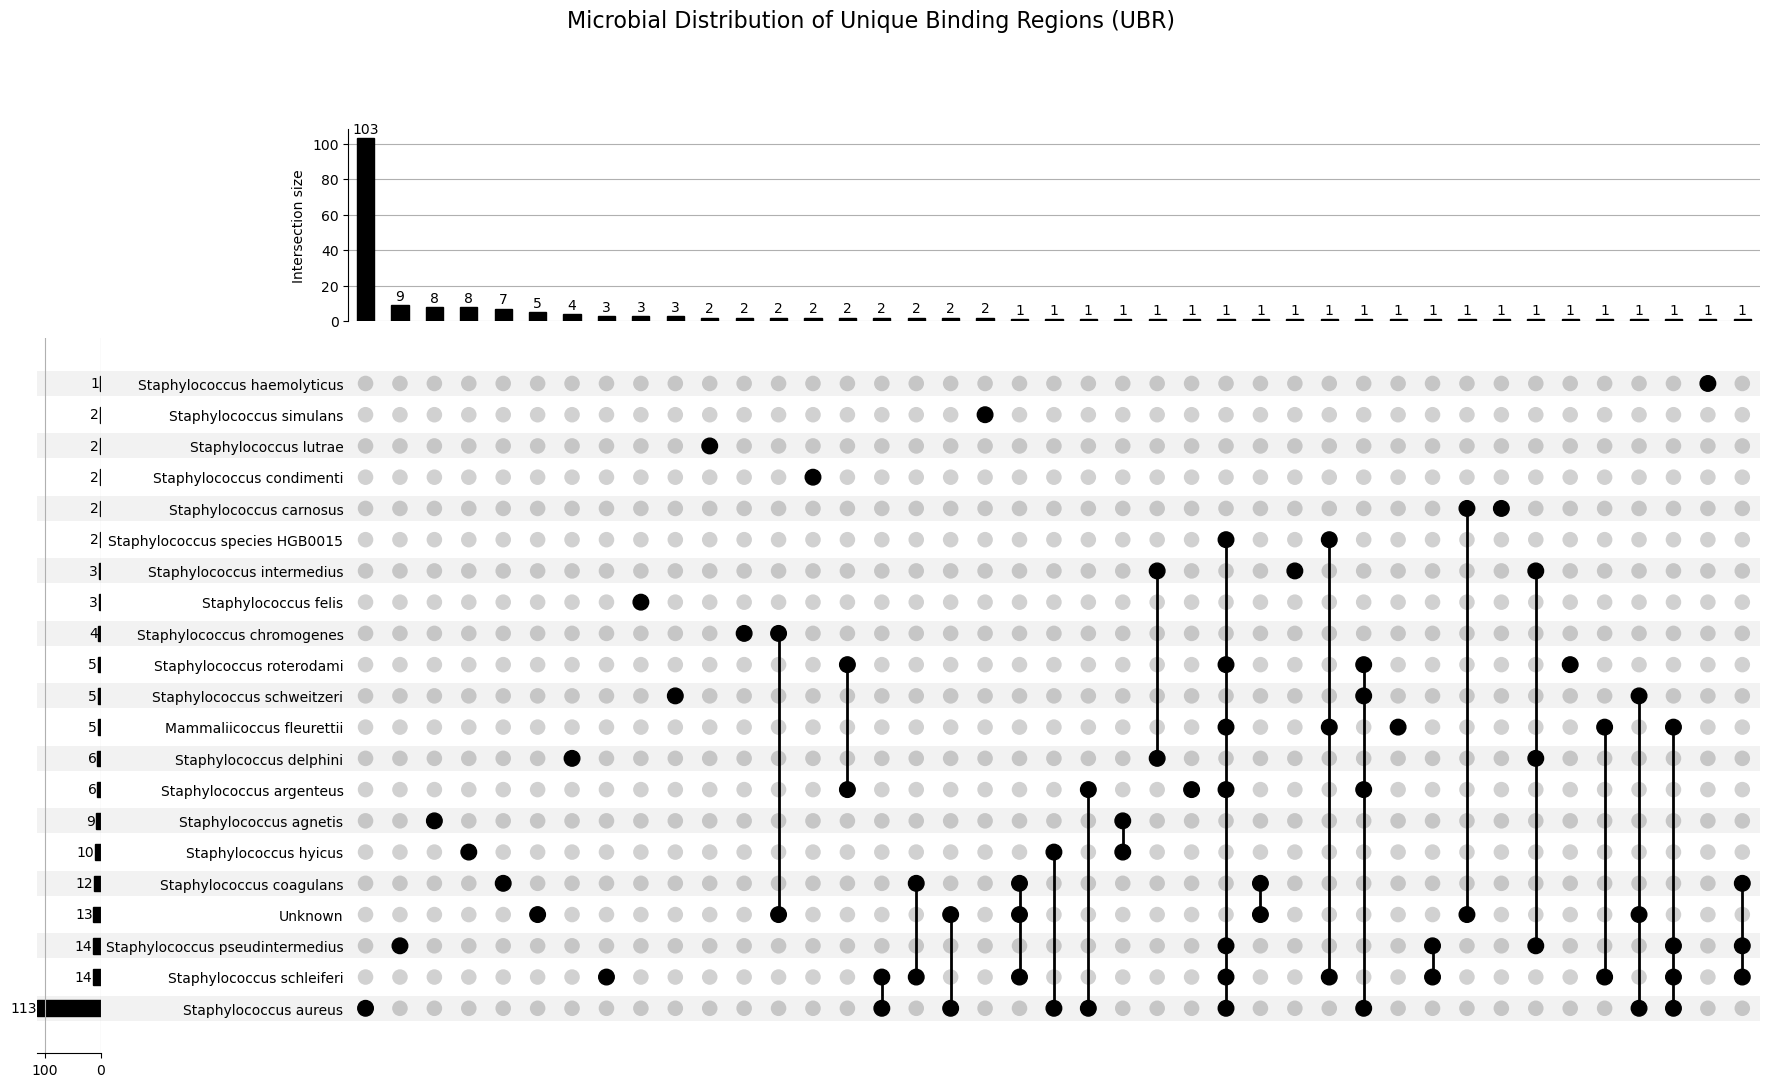

In [109]:
import pandas as pd
from Bio import AlignIO
from collections import defaultdict
from upsetplot import from_indicators, UpSet
import matplotlib.pyplot as plt

# ==========================================
# 1. FILE PATHS & CONFIGURATION
# ==========================================

input_aln ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA of all IgG binders and Protein A domains/MSA of All IgG binders with seq ID without spaces used in the UpSet plot/Final copy of IgG binders plus Protein A domains spaces removed in the Seq ID.clustal_num"
output_xlsx ="/Users/vijaymaranholkar/Desktop/Data availability Beyond-Protein-A-Natural-Variation-in-IgG-Binding-Proteins/Multiple Sequnce Alignment and Phylogeny/MSA of all IgG binders and Protein A domains/MSA of All IgG binders with seq ID without spaces used in the UpSet plot/UBR Distribution of all IgG bindersV1.xlsx"


# ==========================================
# 2. SPECIES MAPPING
# ==========================================
SPECIES_MAP = {
    "Staphylococcus aureus": ["Staphylococcus aureus", "S. aureus", "S_aureus"],
    "Staphylococcus pseudintermedius": ["Staphylococcus pseudintermedius", "S. pseudintermedius", "S_pseudintermedius"],
    "Staphylococcus hyicus": ["Staphylococcus hyicus", "S. hyicus", "S_hyicus"],
    "Staphylococcus coagulans": ["Staphylococcus coagulans", "S. coagulans", "S_coagulans"],
    "Staphylococcus schleiferi": ["Staphylococcus schleiferi", "S. schleiferi", "S_schleiferi"],
    "Staphylococcus species HGB0015": ["Staphylococcus species HGB0015", "Staphylococcus sp. HGB0015", "S. sp. HGB0015", "S_sp_HGB0015"],
    "Staphylococcus argenteus": ["Staphylococcus argenteus", "S. argenteus", "S_argenteus"],
    "Staphylococcus agnetis": ["Staphylococcus agnetis", "S. agnetis", "S_agnetis"],
    "Staphylococcus roterodami": ["Staphylococcus roterodami", "S. roterodami", "S_roterodami"],
    "Staphylococcus delphini": ["Staphylococcus delphini", "S. delphini", "S_delphini"],
    "Staphylococcus schweitzeri": ["Staphylococcus schweitzeri", "S. schweitzeri", "S_schweitzeri"],
    "Staphylococcus haemolyticus": ["Staphylococcus haemolyticus", "S. haemolyticus", "S_haemolyticus"],
    "Staphylococcus simulans": ["Staphylococcus simulans", "S. simulans", "S_simulans"],
    "Mammaliicoccus fleurettii": ["Mammaliicoccus fleurettii", "M. fleurettii", "M_fleurettii"],
    "Staphylococcus felis": ["Staphylococcus felis", "S. felis", "S_felis"],
    "Staphylococcus intermedius": ["Staphylococcus intermedius", "S. intermedius", "S_intermedius"],
    "Staphylococcus chromogenes": ["Staphylococcus chromogenes", "S. chromogenes", "S_chromogenes"],
    "Staphylococcus carnosus": ["Staphylococcus carnosus", "S. carnosus", "S_carnosus"],
    "Staphylococcus condimenti": ["Staphylococcus condimenti", "S. condimenti", "S_condimenti"],
    "Staphylococcus lutrae": ["Staphylococcus lutrae", "S. lutrae", "S_lutrae"],
    "Unknown": ["Unknown"]
}

def identify_species(record_id):
    normalized_id = record_id.lower().replace("_", " ").replace(".", " ")
    for display_name, search_terms in SPECIES_MAP.items():
        for term in search_terms:
            if term.lower().replace(".", " ").replace("_", " ") in normalized_id:
                return display_name
    return None

# ==========================================
# 3. PROCESSING & EXPORT
# ==========================================
def run_full_analysis(input_file, output_file, start=30, end=52):
    # Extract data from alignment
    alignment = AlignIO.read(input_file, 'clustal')
    region_to_ids = defaultdict(list)
    region_to_species = defaultdict(set)
    id_to_full_seq = {}

    for record in alignment:
        species_label = identify_species(record.id)
        if species_label:
            functional_region = str(record.seq)[start-1:end]
            region_to_ids[functional_region].append(record.id)
            region_to_species[functional_region].add(species_label)
            id_to_full_seq[record.id] = str(record.seq)

    # Prepare Excel Sheets
    summary_data = []
    for region, ids in region_to_ids.items():
        count = len(ids)
        for seq_id in ids:
            summary_data.append([region, count, seq_id, id_to_full_seq[seq_id]])
    df_summary = pd.DataFrame(summary_data, columns=['Unique Functional Sequence', 'Count', 'Sequence ID', 'Entire Sequence'])

    ordered_species = list(SPECIES_MAP.keys())
    upset_matrix_data = []
    for region, species_set in region_to_species.items():
        row = {'Unique Functional Region': region}
        for sp in ordered_species:
            row[sp] = 1 if sp in species_set else 0
        upset_matrix_data.append(row)
    df_upset = pd.DataFrame(upset_matrix_data)

    # Save Excel
    with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
        df_summary.to_excel(writer, sheet_name='Unique Sequences', index=False)
        df_upset.to_excel(writer, sheet_name='Unique binding Region', index=False)
    
    print(f"Data analysis complete. File saved at: {output_file}")

    # ==========================================
    # 4. UPSET PLOT GENERATION (NO LABELS)
    # ==========================================
    df_bool = df_upset[ordered_species].astype(bool)
    upset_data = from_indicators(ordered_species, data=df_bool)

    # Create the UpSet plot
    upset = UpSet(upset_data, 
                  subset_size='count', 
                  show_counts=True, 
                  sort_by='cardinality',
                  min_subset_size=1)

    fig = plt.figure(figsize=(18, 10))
    upset.plot(fig=fig)

    plt.suptitle('Microbial Distribution of Unique Binding Regions (UBR)', fontsize=16)
    plt.show()

# Run the pipeline
run_full_analysis(input_aln, output_xlsx)